In [223]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [225]:
dataset = pd.read_csv("sales_data_with_revenue.csv")

In [227]:
# step 1: inspect dataset
# data exploration
# display first 5
print(dataset.head())

  product_category  units_sold  price_per_unit  is_returned   sale_date  \
0                C          96      356.542747            0  2020-01-01   
1                D          94      386.211956            1  2020-01-02   
2                A          47       52.772188            1  2020-01-03   
3                C          99      257.990939            0  2020-01-04   
4                C          55      466.687028            1  2020-01-05   

   total_revenue  
0    5178.878929  
1    4983.644721  
2    1146.226516  
3    5332.891565  
4    2269.065707  


In [228]:
# step 2: display last 5
print(dataset.tail())

    product_category  units_sold  price_per_unit  is_returned   sale_date  \
595                D          84      185.322662            1  2021-08-18   
596                A          97      167.826404            1  2021-08-19   
597                C          20      488.958529            0  2021-08-20   
598                D          12      108.420954            1  2021-08-21   
599                B          47      349.665031            1  2021-08-22   

     total_revenue  
595    3752.724759  
596    4996.688882  
597     950.703783  
598     237.410209  
599    1756.339211  


In [231]:
# step 3: display dataset summary
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_category  600 non-null    object 
 1   units_sold        600 non-null    int64  
 2   price_per_unit    600 non-null    float64
 3   is_returned       600 non-null    int64  
 4   sale_date         600 non-null    object 
 5   total_revenue     600 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 28.3+ KB
None


In [232]:
# step 5: check missing values
missing_values = dataset.isnull().sum()
print("\nmissing_values in each column:")
print(missing_values)


missing_values in each column:
product_category    0
units_sold          0
price_per_unit      0
is_returned         0
sale_date           0
total_revenue       0
dtype: int64


In [233]:
# step 4: displaybasic statistics
print(dataset.describe())

       units_sold  price_per_unit  is_returned  total_revenue
count  600.000000      600.000000   600.000000     600.000000
mean    49.755000      261.336305     0.498333    2060.081749
std     29.340753      142.508264     0.500414    1533.020936
min      1.000000       10.116387     0.000000       5.898860
25%     24.000000      136.865445     0.000000     752.983889
50%     51.000000      268.132628     0.000000    1622.882745
75%     75.000000      385.321422     1.000000    3182.433373
max     99.000000      499.683215     1.000000    5645.523507


In [236]:
dataset["total_revenue"] = dataset["units_sold"] * dataset["price_per_unit"]
print(dataset)

    product_category  units_sold  price_per_unit  is_returned   sale_date  \
0                  C          96      356.542747            0  2020-01-01   
1                  D          94      386.211956            1  2020-01-02   
2                  A          47       52.772188            1  2020-01-03   
3                  C          99      257.990939            0  2020-01-04   
4                  C          55      466.687028            1  2020-01-05   
..               ...         ...             ...          ...         ...   
595                D          84      185.322662            1  2021-08-18   
596                A          97      167.826404            1  2021-08-19   
597                C          20      488.958529            0  2021-08-20   
598                D          12      108.420954            1  2021-08-21   
599                B          47      349.665031            1  2021-08-22   

     total_revenue  
0     34228.103699  
1     36303.923836  
2      2480.

In [238]:
# step 6: total revenue
total_revenue = dataset["total_revenue"].sum()
print(dataset["total_revenue"], {total_revenue})



0      34228.103699
1      36303.923836
2       2480.292836
3      25541.102923
4      25667.786524
           ...     
595    15567.103604
596    16279.161196
597     9779.170586
598     1301.051448
599    16434.256457
Name: total_revenue, Length: 600, dtype: float64 {7842087.086850101}


In [239]:
# step 7: total is_returned
total_is_returned = dataset["units_sold"].sum()
print(dataset["is_returned"], {total_is_returned})

0      0
1      1
2      1
3      0
4      1
      ..
595    1
596    1
597    0
598    1
599    1
Name: is_returned, Length: 600, dtype: int64 {29853}


In [240]:
#step 9: grouping $aggregating data: price_per_unit
price_per_unit = dataset.groupby("units_sold")["total_revenue"].sum()
print("\ntotal price_per_unit:")
print(price_per_unit)


total price_per_unit:
units_sold
1       2568.842381
2       1644.786273
3       4452.195563
4      10001.786189
5      12375.399411
          ...      
95    245422.341521
96    219387.053247
97     42203.908432
98     81623.886609
99    221669.755728
Name: total_revenue, Length: 99, dtype: float64


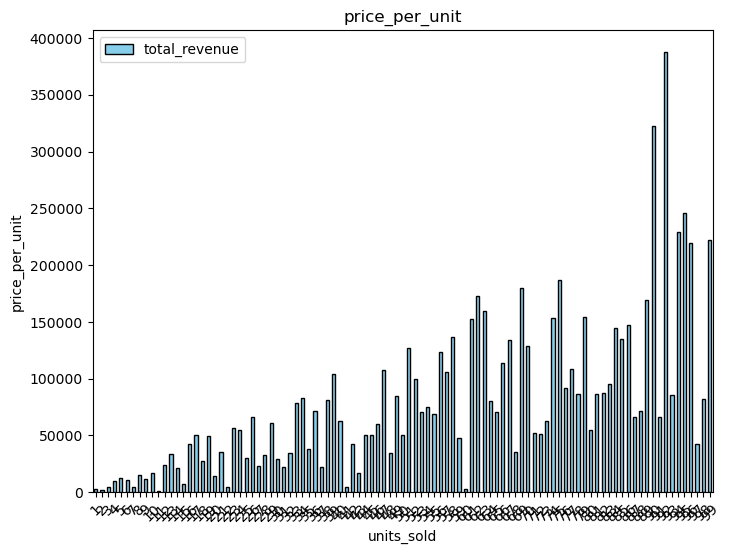

In [242]:
#step 10: visualize the data
#total price_per_unit (bar chart)
price_per_unit.plot(kind="bar", figsize=(8, 6),color="skyblue",edgecolor="black")
sns.barplot(data=dataset,x="units_sold", y="price_per_unit", errorbar = None)
plt.title("price_per_unit")
plt.ylabel("price_per_unit")
plt.xlabel("units_sold")
plt.xticks(rotation=45)
plt.show()

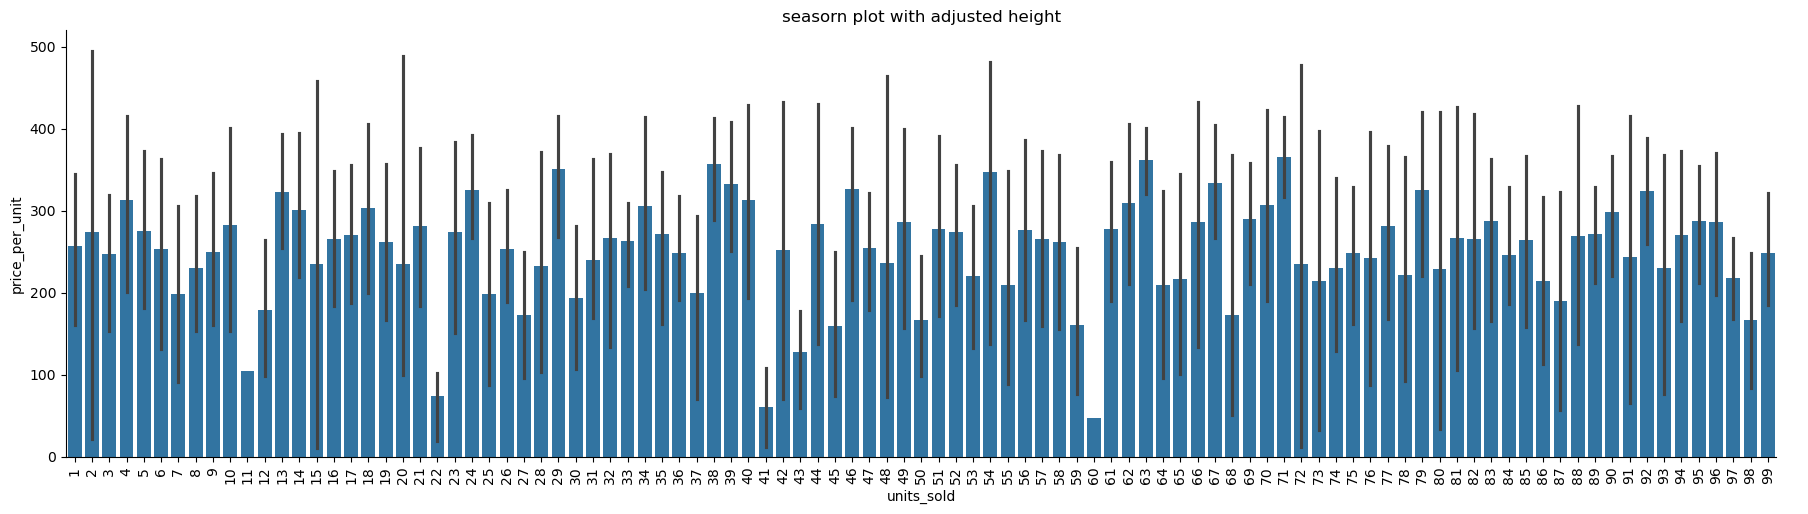

In [244]:
sns.catplot(data=dataset,x="units_sold", y="price_per_unit",kind="bar", height=5, aspect=3.6)
plt.title("seasorn plot with adjusted height")
plt.xticks(rotation=90)
plt.show()

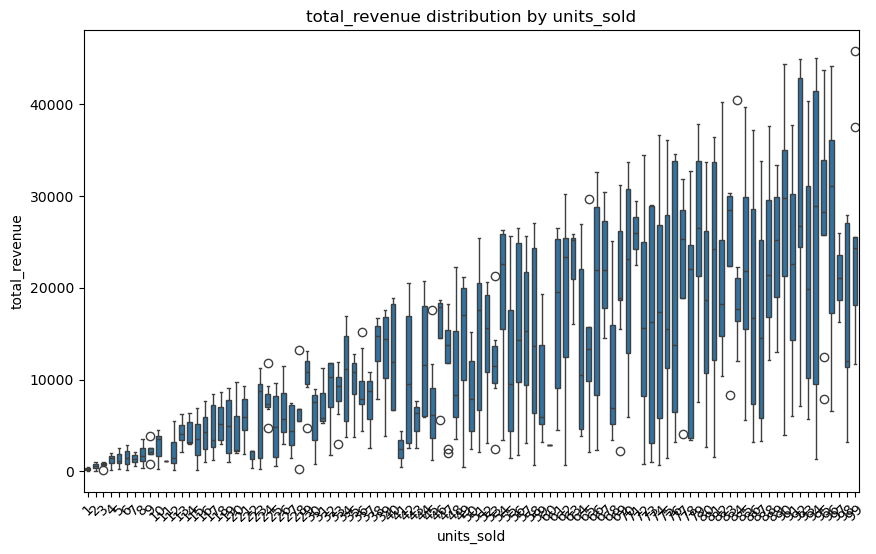

In [247]:
#step 11: total_revenue distribution by units_sold 
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset, x="units_sold", y="total_revenue", width=0.6)
plt.title("total_revenue distribution by units_sold")
plt.ylabel("total_revenue")
plt.xlabel("units_sold")
plt.xticks(rotation=45)
plt.show()

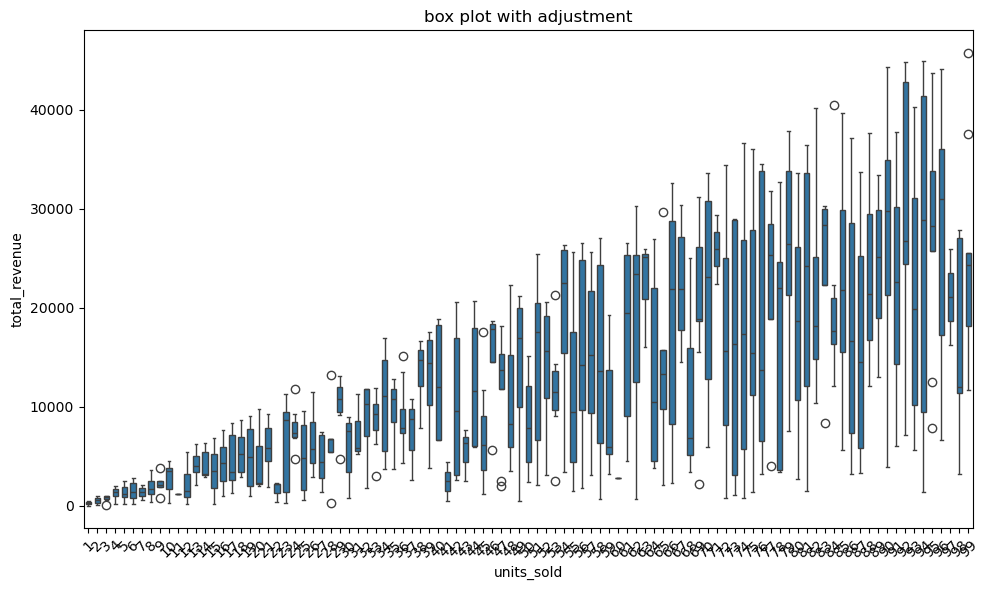

In [248]:
#box plot with proper adjustment
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset, x="units_sold", y="total_revenue", width=0.6)
plt.title("box plot with adjustment")
plt.xticks(rotation=45)
plt.subplots_adjust()
plt.tight_layout()
plt.show()

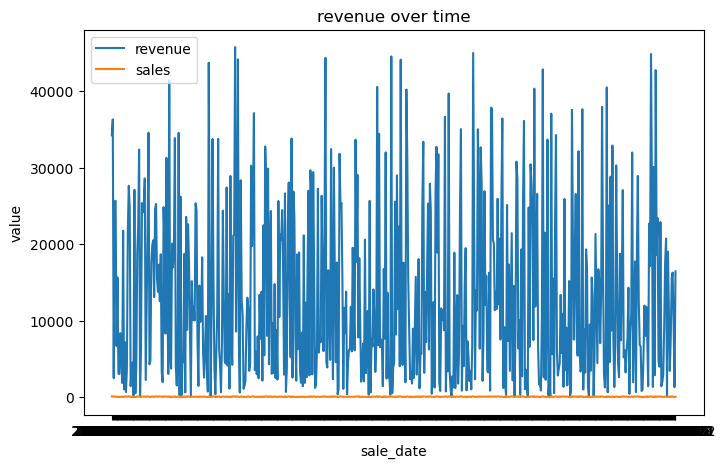

In [249]:
# step 12: sales and revenue trend
plt.figure(figsize=(8, 5))
sns.lineplot(data=dataset,x="sale_date", y="total_revenue", label="revenue")
sns.lineplot(data=dataset,x="sale_date", y="units_sold", label="sales")
plt.title("revenue over time")
plt.xlabel("sale_date")
plt.ylabel("value")
plt.legend()
plt.show()
           


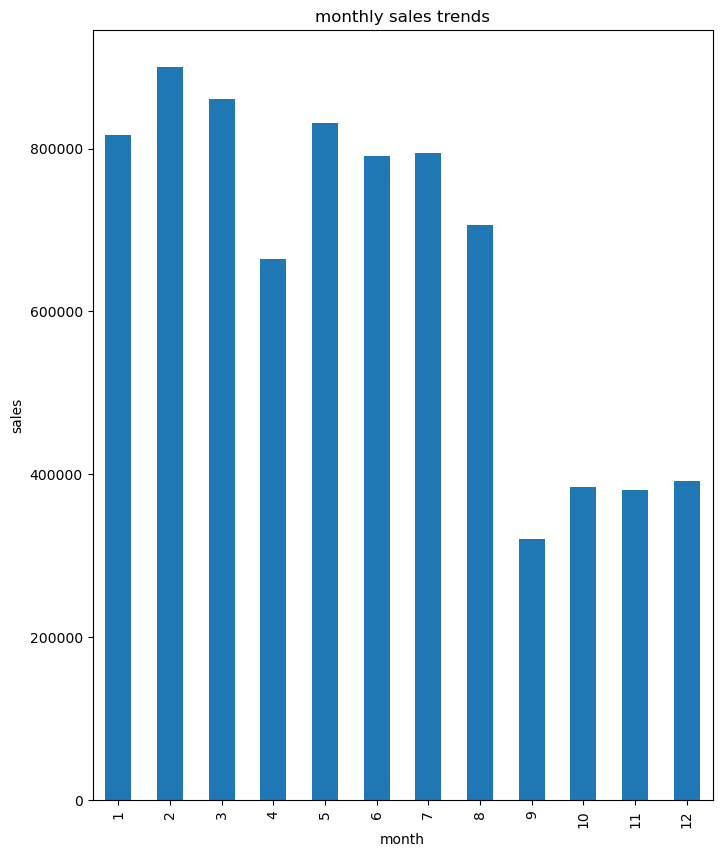

In [255]:
# step 13:revenue trend over time
#seasonality
dataset["sale_date"]=pd.to_datetime(dataset["sale_date"])
dataset["month"]=dataset["sale_date"].dt.month
monthly_sales=dataset.groupby("month")["total_revenue"].sum()
plt.figure(figsize=(8, 10))
monthly_sales.plot(kind="bar", title="monthly sales trends")
plt.xlabel("month")
plt.ylabel("sales")
plt.show()